In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ../src

/Users/alessandro.romualdi/projects/gionni/40_FPUT/fput/src


In [22]:
from classes import FPU
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np 
from sklearn.preprocessing import StandardScaler

In [8]:
"""
System inputs
"""

NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
T_MAX = 40000   # maximum time of simulation
INTEGRATION_TIME_STEP = 0.1
INITIAL_MODE_NUMBER=1
NUM_MODES = 3  # number of modes to be observed
ALPHA_REF = 1
BETA_REF = 2

In [6]:
# compute initial energy mode 1
# target ini energy = 10^-4

fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=0.1608,
    t_step=INTEGRATION_TIME_STEP,
    t_max=T_MAX,
    alpha=ALPHA_REF,
    beta=BETA_REF
)

fpu._compute_mode_energy(fpu.q[:, 0], fpu.p[:, 0], 1)/32

0.00040035950649055325

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49999/49999 [00:22<00:00, 2264.13it/s]


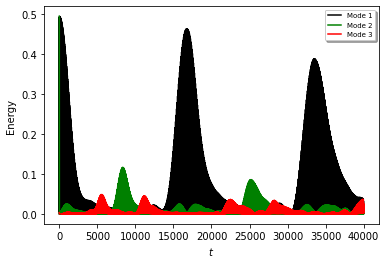

In [77]:
"""
FPU
"""

INITIAL_MODE_AMPLITUDE = 1

fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=0.8,
    t_max=T_MAX,
    alpha=ALPHA_REF,
    beta=BETA_REF
)

time_steps, q, p, mode_energies = fpu.run()

"""
Plots
"""
plt.plot(time_steps, mode_energies[0, :],'k-', linewidth=1.5, label='Mode 1')
plt.plot(time_steps, mode_energies[1, :],'g-', linewidth=1.5, label='Mode 2')
plt.plot(time_steps, mode_energies[2, :],'r-', linewidth=1.5, label='Mode 3')

plt.xlabel('$t$ ')
plt.ylabel('Energy ')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
#plt.savefig(f'../notebooks/output/fput_init_mode_en_{INITIAL_MODE_AMPLITUDE}.pdf')
plt.show()

Text(0.5, 1.0, 'average mode energies. Initial amplitude = 1 ')

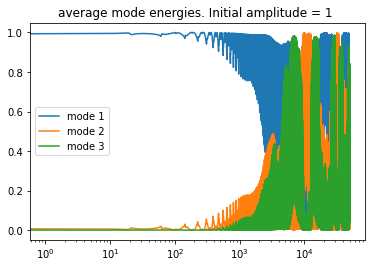

In [78]:
"""
Average mode energies 
"""
tot_energy = mode_energies.sum(axis=0)
plt.semilogx(mode_energies[0, :] / tot_energy, label="mode 1")
plt.semilogx(mode_energies[1, :] / tot_energy, label="mode 2")
plt.semilogx(mode_energies[2, :] / tot_energy, label="mode 3")
plt.legend()
plt.title(f"average mode energies. Initial amplitude = {INITIAL_MODE_AMPLITUDE} ")
plt.savefig(f'../notebooks/output/avg_mode_en_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

(50000, 64)
[3.29007096e-01 1.04346522e-01 7.87330901e-02 7.77712687e-02
 7.39441805e-02 6.79594188e-02 6.29518527e-02 4.53097168e-02
 4.27002151e-02 2.72607227e-02 2.21766409e-02 1.89624078e-02
 1.31848884e-02 1.15476230e-02 5.88625007e-03 5.75715205e-03
 2.94303921e-03 2.90032250e-03 1.68174166e-03 1.47984063e-03
 9.84243106e-04 7.19515185e-04 5.20774034e-04 3.16530372e-04
 3.03811633e-04 1.64319673e-04 1.43761107e-04 8.97274106e-05
 7.01784821e-05 4.54845470e-05 3.59058137e-05 2.28709744e-05
 1.75449519e-05 1.17394262e-05 9.37539648e-06 7.64272799e-06
 7.17913356e-06 6.08481579e-06 5.23433042e-06 4.70284418e-06
 2.44444018e-06 1.73218775e-06 1.21929704e-06 8.60311165e-07
 6.10423476e-07 4.60419472e-07 3.78177543e-07 3.52417363e-07
 3.16038491e-07 2.67969051e-07 1.67907536e-07 1.43841437e-07
 1.37232031e-07 1.28843995e-07 4.05484622e-08 3.83047034e-08
 2.76432836e-08 2.49633420e-08 1.10520611e-08 9.80419871e-09
 9.05007691e-09 2.64755505e-09 7.73329466e-10 5.34420096e-10]


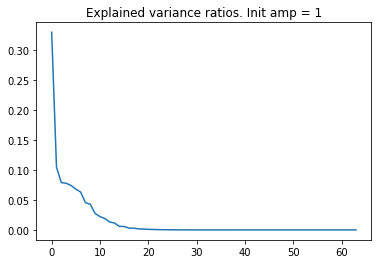

In [100]:
"""
PCA
"""
scaler = StandardScaler()

X = np.concatenate([q.T, p.T], axis=1)
print(X.shape)

X = scaler.fit_transform(X)

pca = PCA(n_components=64)
X_tr = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

plt.title(f"Explained variance ratios. Init amp = {INITIAL_MODE_AMPLITUDE}")
plt.savefig(f'../notebooks/output/exp_var_ratio_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

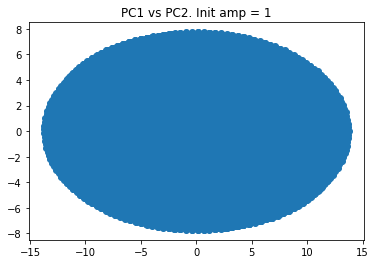

In [101]:
plt.scatter(X_tr[:, 0], X_tr[:, 1])
plt.title("PC1 vs PC2. Init amp = 1")
plt.savefig(f'../notebooks/output/pc1_and_pc2_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

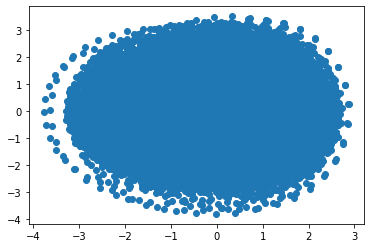

In [69]:
plt.scatter(X[:, 0], X[:, 32])

# Compute PCs vs initial energies

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
T_MAX = 20000   # maximum time of simulation
INTEGRATION_TIME_STEP = 0.1

ALPHA_REF = 1
BETA_REF = 2

ALPHA = ALPHA_REF  # non-linearity coefficient (quadratic term), alpha must be <= 0.25
BETA = BETA_REF  # non-linearity coefficient (cubic term), beta can be 0.3, 1, 3 etc.


explained_variance_ratio_vs_energy = list()

for INITIAL_MODE_AMPLITUDE in range(1, 20):
    fpu = FPU(
        num_atoms=NUM_ATOMS,
        num_modes=3,
        initial_mode_number=1,
        initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
        t_step=INTEGRATION_TIME_STEP,
        t_max=T_MAX,
        alpha=ALPHA,
        beta=BETA
    )
    
    time_steps, q, p, mode_energies = fpu.run()
    
    X = np.concatenate([q.T, p.T], axis=1)

    X = scaler.fit_transform(X)
    
    pca = PCA(n_components=64)
    X_tr = pca.fit_transform(X)

    explained_variance_ratio_vs_energy.append(pca.explained_variance_ratio_)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199999/199999 [01:34<00:00, 2125.21it/s]


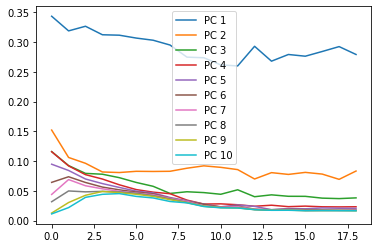

In [97]:
for i in range(10):
    plt.plot(explained_variance_ratio_vs_energy[:, i], label=f"PC {i+1}")

plt.legend();